In [2]:
import pandas as pd 
import numpy as np
import itertools 
import seaborn as sns
import matplotlib.pyplot as plt
import joypy

In [3]:
orthogroups = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Orthogroups.tsv', sep = '\t')
orthogroups

,Orthogroup,SlycHeinz4.0,Smel4.1,Solabu2_1.0.4,Solaet3_3.0.4,Solcan1_1.0.4,Solcle2_1.0.4,Soletu1_1.0.4,Solgig1_1.0.4,Sollin1_1.0.4,SollycM82_1.0.4,SollycSweet-100_2.0.4,Solmac3_3.0.4,Solmur2hap1_2.0.4,Solmur2hap2_2.0.4,Solpri1_2.0.4,Solqui2_2.0.4,Solrob1_1.0.4
0,OG0000000,NaN,"SMEL4.1_00g007950.1.01, SMEL4.1_00g008920.1.01...","Solabu2.01g007150.1, Solabu2.01g008630.1, Sola...","Solaet3.01g012880.1, Solaet3.01g015280.1, Sola...","Solcan1.01g001750.1, Solcan1.01g006400.1, Solc...","Solcle2.01g009770.1, Solcle2.01g020010.1, Solc...","Soletu1.01g012220.1, Soletu1.09g011190.1, Sole...","Solgig1.01g009290.1, Solgig1.01g010580.1, Solg...","Sollin1.01g004130.1, Sollin1.01g006120.1, Soll...",NaN,SollycSweet-100.02g006670.1,"Solmac3.01g004710.1, Solmac3.01g005730.1, Solm...","Solmur2hap1.03g007570.1, Solmur2hap1.04g010710...","Solmur2hap2.03g007770.1, Solmur2hap2.05g016120...","Solpri1.01g002060.1, Solpri1.01g010200.1, Solp...","Solqui2.01g004180.1, Solqui2.01g011410.1, Solq...","Solrob1.01g001070.1, Solrob1.01g007660.1, Solr..."
1,OG0000001,NaN,"SMEL4.1_00g001660.1.01, SMEL4.1_00g001710.1.01...","Solabu2.02g000030.1, Solabu2.02g000040.1, Sola...","Solaet3.02g000060.1, Solaet3.02g000410.1, Sola...","Solcan1.01g000150.1, Solcan1.ctg00000004g00003...","Solcle2.ctg00000001g000020.1, Solcle2.ctg00000...","Soletu1.ctg00000005g000010.1, Soletu1.ctg00000...","Solgig1.02g000010.1, Solgig1.02g000050.1, Solg...","Sollin1.02g000010.1, Sollin1.02g000050.1, Soll...","SollycM82.ctg00000028g000020.1, SollycM82.ctg0...","SollycSweet-100.ctg00000007g000060.1, SollycSw...","Solmac3.02g000350.1, Solmac3.02g000560.1, Solm...","Solmur2hap1.02g000070.1, Solmur2hap1.02g000320...","Solmur2hap2.02g000010.1, Solmur2hap2.02g000070...","Solpri1.02g000030.1, Solpri1.02g000140.1, Solp...","Solqui2.02g034670.1, Solqui2.09g017150.1, Solq...","Solrob1.02g026320.1, Solrob1.02g035130.1, Solr..."
2,OG0000002,NaN,"SMEL4.1_00g001730.1.01, SMEL4.1_00g002590.1.01...","Solabu2.02g000170.1, Solabu2.02g000320.1, Sola...","Solaet3.02g000330.1, Solaet3.02g000430.1, Sola...","Solcan1.ctg00000004g000010.1, Solcan1.ctg00000...","Solcle2.02g000020.1, Solcle2.02g000040.1, Solc...","Soletu1.ctg00000074g000010.1, Soletu1.ctg00000...","Solgig1.02g000030.1, Solgig1.ctg00000001g00004...","Sollin1.02g000030.1, Sollin1.02g000110.1, Soll...","SollycM82.ctg00000420g000010.1, SollycM82.ctg0...","SollycSweet-100.ctg00000006g000010.1, SollycSw...","Solmac3.02g000140.1, Solmac3.02g000380.1, Solm...","Solmur2hap1.02g000030.1, Solmur2hap1.02g000040...","Solmur2hap2.02g000030.1, Solmur2hap2.02g000130...","Solpri1.01g010730.1, Solpri1.01g011910.1, Solp...","Solqui2.09g017170.1, Solqui2.ctg00000062g00001...","Solrob1.02g026300.1, Solrob1.02g034570.1, Solr..."
3,OG0000003,Solyc02g004000.1.1,"SMEL4.1_00g001580.1.01, SMEL4.1_00g001670.1.01...","Solabu2.02g000050.1, Solabu2.02g000080.1, Sola...","Solaet3.02g000070.1, Solaet3.02g000130.1, Sola...","Solcan1.ctg00000007g000030.1, Solcan1.ctg00000...","Solcle2.11g017400.1, Solcle2.ctg00000002g00002...","Soletu1.ctg00000005g000030.1, Soletu1.ctg00000...","Solgig1.02g000020.1, Solgig1.02g000060.1, Solg...","Sollin1.02g000020.1, Sollin1.02g000060.1, Soll...","SollycM82.ctg00000029g000010.1, SollycM82.ctg0...","SollycSweet-100.ctg00000002g000010.1, SollycSw...","Solmac3.02g000130.1, Solmac3.02g000430.1, Solm...","Solmur2hap1.02g000050.1, Solmur2hap1.02g000100...","Solmur2hap2.02g000020.1, Solmur2hap2.02g000080...","Solpri1.01g010660.1, Solpri1.02g000040.1, Solp...","Solqui2.02g034690.1, Solqui2.09g017160.1, Solq...","Solrob1.02g026310.1, Solrob1.02g034470.1, Solr..."
4,OG0000004,NaN,"SMEL4.1_00g006210.1.01, SMEL4.1_08g009900.1.01...",NaN,"Solaet3.02g000010.1, Solaet3.02g000630.1, Sola...","Solcan1.01g000130.1, Solcan1.ctg00000000g00002...","Solcle2.ctg00000073g000010.1, Solcle2.ctg00000...","Soletu1.08g005110.1, Soletu1.11g002430.1, Sole...","Solgig1.02g000070.1, Solgig1.ctg00000001g00013...","Sollin1.ctg00000005g000020.1, Sollin1.ctg00000...","SollycM82.ctg000001

In [4]:
quitoense_table = orthogroups[['Orthogroup','Solqui2_2.0.4']]
quitoense_table = quitoense_table.dropna()
quitoense_table

,Orthogroup,Solqui2_2.0.4
0,OG0000000,"Solqui2.01g004180.1, Solqui2.01g011410.1, Solq..."
1,OG0000001,"Solqui2.02g034670.1, Solqui2.09g017150.1, Solq..."
2,OG0000002,"Solqui2.09g017170.1, Solqui2.ctg00000062g00001..."
3,OG0000003,"Solqui2.02g034690.1, Solqui2.09g017160.1, Solq..."
4,OG0000004,"Solqui2.11g021290.1, Solqui2.ctg00000097g00001..."
...,...,...
44941,OG0044941,Solqui2.12g007080.1
44942,OG0044942,Solqui2.12g008170.1
44943,OG0044943,Solqui2.12g021870.1
44944,OG0044944,Solqui2.ctg00000562g000010.1


In [5]:
len(quitoense_table['Solqui2_2.0.4'][0].replace(" ",'').split(','))

79

In [6]:
df_conversion_base = []
list_of_lenghts = []
for Orthogroup_row in quitoense_table.iterrows():
    current_orthogroup = Orthogroup_row[1][0]
    current_list_of_genes_in_group = Orthogroup_row[1][1].replace(" ",'').split(',')
    list_of_lenghts.append(len(current_list_of_genes_in_group))
    if len(current_list_of_genes_in_group) >2 or len(current_list_of_genes_in_group) == 1:
        continue
    orthogroup_list = [current_orthogroup]*len(current_list_of_genes_in_group)
    zipped_list = zip(orthogroup_list, current_list_of_genes_in_group)
    df_conversion_base.extend(list(zipped_list))


Text(0.5, 1.0, 'Current Threshold is 31')

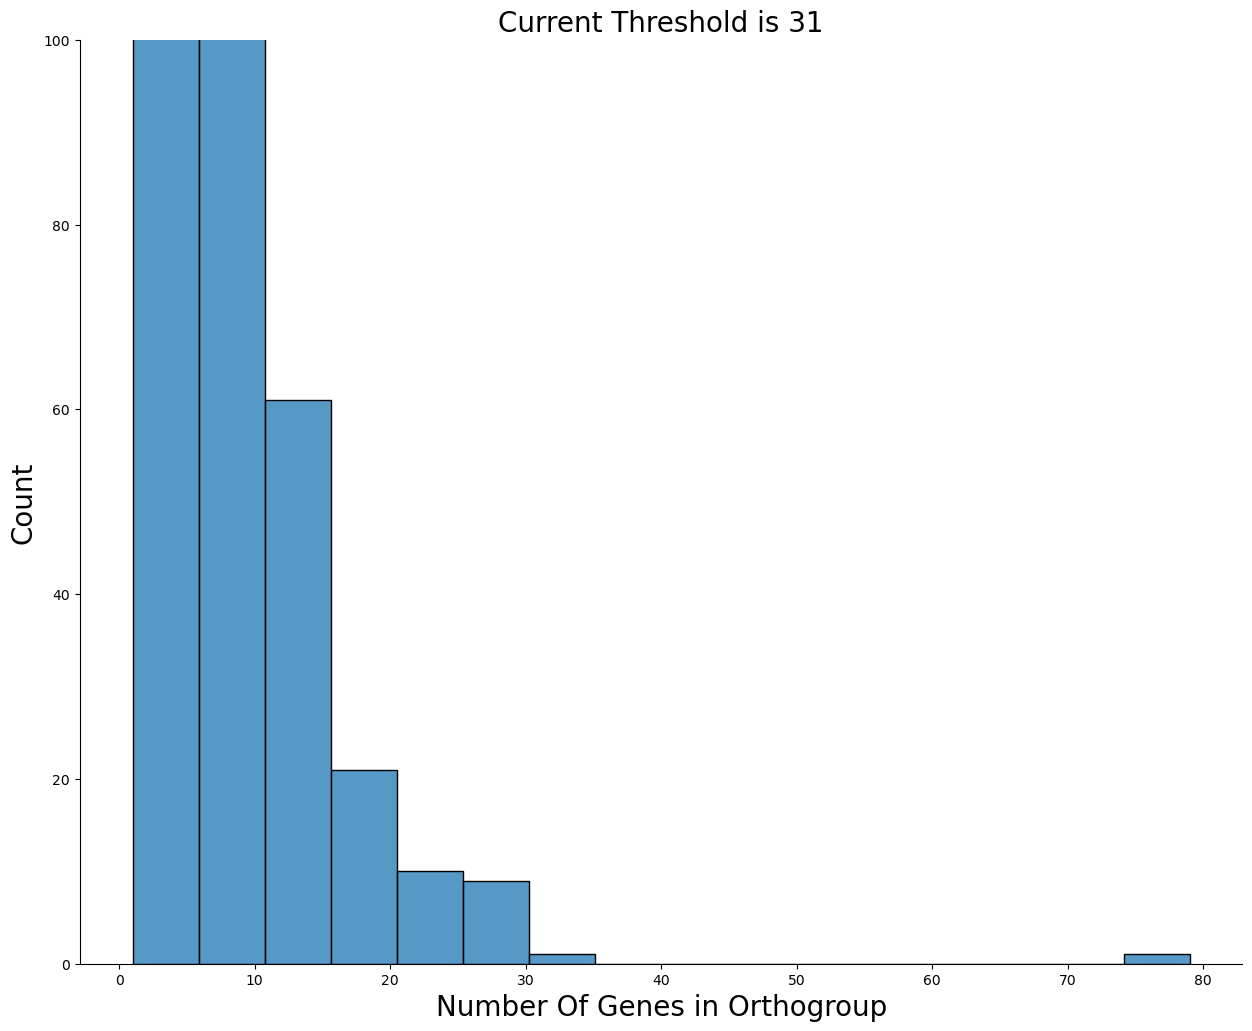

In [7]:
fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot( x =list_of_lenghts,)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Number Of Genes in Orthogroup", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.ylim((0,100))
plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [8]:
quitoense_long_df = pd.DataFrame(data=df_conversion_base, columns = ['Orthogroup','Gene'])
quitoense_long_df

,Orthogroup,Gene
0,OG0000022,Solqui2.ctg00000165g000010.1
1,OG0000022,Solqui2.ctg00000452g000020.1
2,OG0000083,Solqui2.ctg00000598g000050.1
3,OG0000083,Solqui2.ctg00000598g000060.1
4,OG0000090,Solqui2.01g005200.1
...,...,...
5601,OG0044937,Solqui2.12g014290.1
5602,OG0044940,Solqui2.12g006340.1
5603,OG0044940,Solqui2.12g006350.1
5604,OG0044945,Solqui2.ctg00000737g000090.1


In [9]:
quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == 'OG0044943']

,Orthogroup,Gene


In [10]:
current_list_of_genes_in_group

['Solqui2.ctg00000737g000090.1', 'Solqui2.ctg00000737g000100.1']

In [11]:
### Block for when groups are bigger than 2
# list_of_gene_pairs_in_ortho_group = []
# for ortho in set(quitoense_long_df['Orthogroup']):
#     matched_long_df = quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == ortho]
#     all_combinations_in_orthogroup = list(itertools.combinations(matched_long_df['Gene'].to_list(),2))
#     list_of_gene_pairs_in_ortho_group.extend(all_combinations_in_orthogroup)

In [12]:
## For groups of only 2
list_of_gene_pairs_in_ortho_group = []
for ortho in set(quitoense_long_df['Orthogroup']):
    matched_long_df = quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == ortho]
    all_combinations_in_orthogroup = matched_long_df['Gene'].to_list()
    all_combinations_in_orthogroup.append(ortho)
    list_of_gene_pairs_in_ortho_group.append(all_combinations_in_orthogroup)

In [13]:
ortho_gene_pairs_df = pd.DataFrame(data=  list_of_gene_pairs_in_ortho_group, columns = ['Alpha Gene','Beta Gene','Orthogroup'])
ortho_gene_pairs_df

,Alpha Gene,Beta Gene,Orthogroup
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239
...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120


In [14]:
normalized_combined_sample = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/fpkm_normalized_combined_samples.tsv', sep = '\t', index_col= 0)


In [15]:
normalized_combined_sample.index = normalized_combined_sample.index+".1"

In [16]:
normalized_combined_sample['Mean'] = normalized_combined_sample.mean(axis =1)
normalized_combined_sample

,Rep 1,Rep 2,Mean
FEATURE_ID,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754
Solqui2.Cg000020.1,0.088258,0.122627,0.105443
Solqui2.Cg000030.1,0.000000,0.000000,0.000000
ncRNA_Solqui2.Cg003561.1,0.000000,0.000000,0.000000
Solqui2.Cg000040.1,0.000000,0.000000,0.000000
...,...,...,...
Solqui2.ctg00000757g000020.1,0.000000,0.000000,0.000000
Solqui2.ctg00000760g000010.1,1.124269,0.052069,0.588169
Solqui2.ctg00000762g000010.1,0.000000,0.000000,0.000000


In [17]:
quitoense_exploration_of_btw_rep_variance = normalized_combined_sample.copy()
quitoense_exploration_of_btw_rep_variance['Rep Difference'] = quitoense_exploration_of_btw_rep_variance['Rep 1'] - quitoense_exploration_of_btw_rep_variance['Rep 2']

In [18]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference
FEATURE_ID,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370
Solqui2.Cg000030.1,0.000000,0.000000,0.000000,0.000000
ncRNA_Solqui2.Cg003561.1,0.000000,0.000000,0.000000,0.000000
Solqui2.Cg000040.1,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
Solqui2.ctg00000757g000020.1,0.000000,0.000000,0.000000,0.000000
Solqui2.ctg00000760g000010.1,1.124269,0.052069,0.588169,1.072200
Solqui2.ctg00000762g000010.1,0.000000,0.000000,0.000000,0.000000


In [19]:
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.replace(0,np.nan)
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.dropna(subset = ['Rep 1','Rep 2'], how = 'all')
quitoense_exploration_of_btw_rep_variance = quitoense_exploration_of_btw_rep_variance.replace(np.nan, 0)
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference
FEATURE_ID,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370
Solqui2.Cg000050.1,0.186422,0.621646,0.404034,-0.435224
Solqui2.Cg000060.1,0.101622,0.169435,0.135528,-0.067813
Solqui2.Cg000070.1,0.537335,0.656994,0.597164,-0.119660
...,...,...,...,...
Solqui2.ctg00000691g000010.1,0.023048,0.076856,0.049952,-0.053808
ncRNA_Solqui2.ctg00000739g003721.1,4.515794,0.721979,2.618887,3.793815
ncRNA_Solqui2.ctg00000739g003731.1,0.056387,0.000000,0.028193,0.056387


In [20]:
quitoense_exploration_of_btw_rep_variance.max()

Rep 1             14176.429052
Rep 2             23976.249904
Mean              19076.339478
Rep Difference     3315.433492
dtype: float64

In [21]:
quitoense_exploration_of_btw_rep_variance.median()

Rep 1             7.892130
Rep 2             7.615160
Mean              8.020551
Rep Difference    0.076655
dtype: float64

In [22]:
np.percentile(quitoense_exploration_of_btw_rep_variance['Rep Difference'], 95)

16.530548768263195

(0.0, 1250.0)

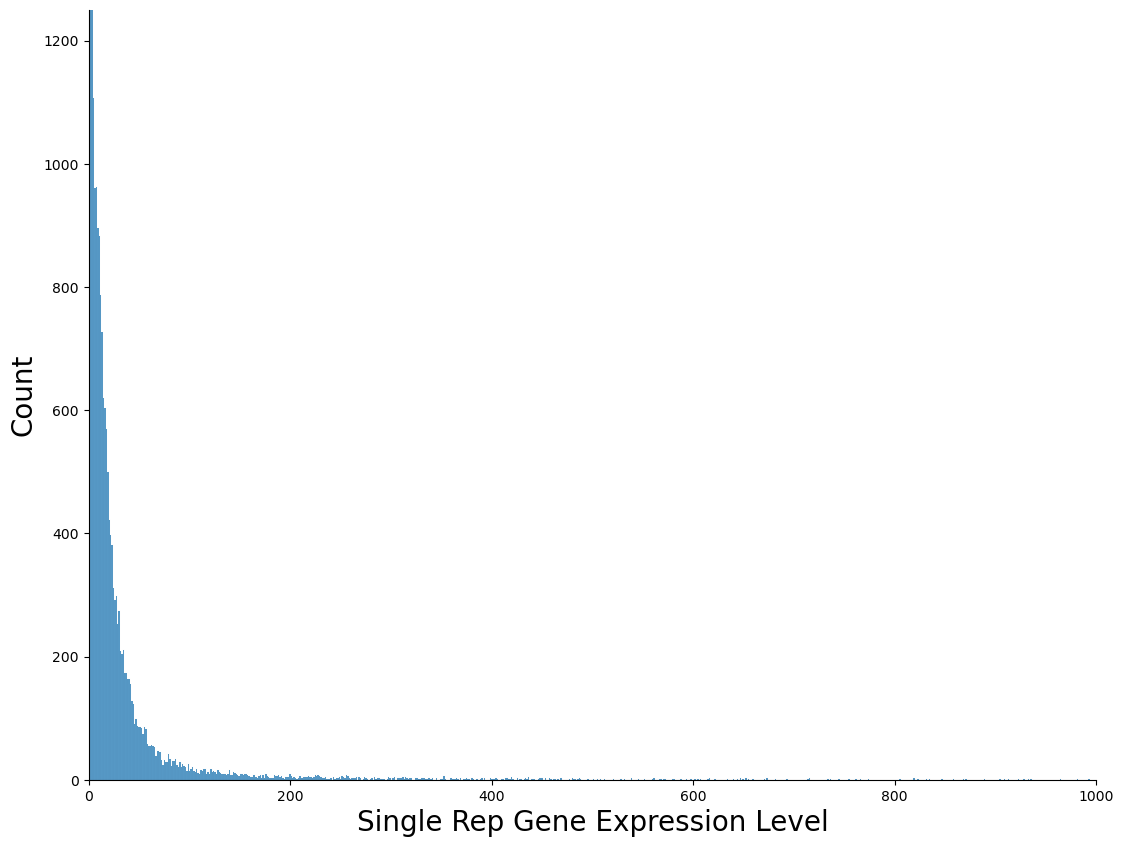

In [23]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Rep 1',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Single Rep Gene Expression Level", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,1000))
plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

(0.0, 1250.0)

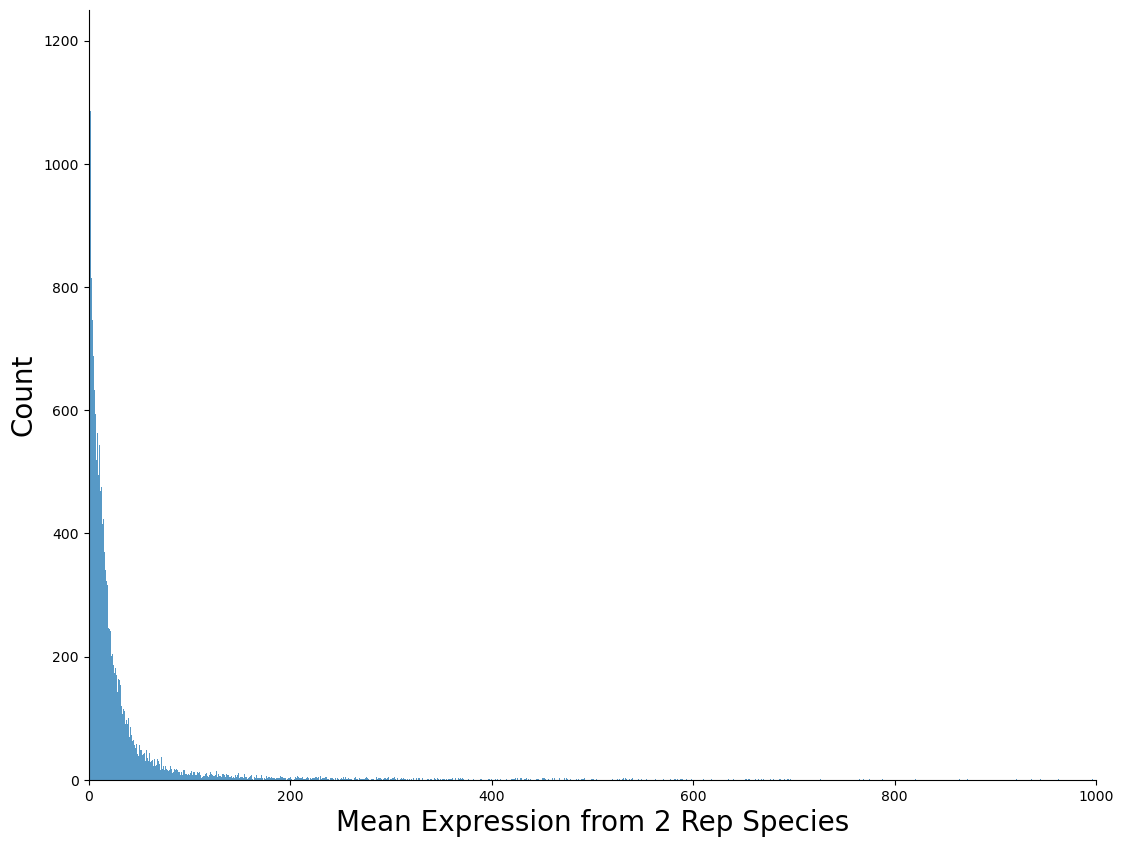

In [24]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = normalized_combined_sample, x = 'Mean',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Mean Expression from 2 Rep Species", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,1000))
plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [25]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference
FEATURE_ID,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370
Solqui2.Cg000050.1,0.186422,0.621646,0.404034,-0.435224
Solqui2.Cg000060.1,0.101622,0.169435,0.135528,-0.067813
Solqui2.Cg000070.1,0.537335,0.656994,0.597164,-0.119660
...,...,...,...,...
Solqui2.ctg00000691g000010.1,0.023048,0.076856,0.049952,-0.053808
ncRNA_Solqui2.ctg00000739g003721.1,4.515794,0.721979,2.618887,3.793815
ncRNA_Solqui2.ctg00000739g003731.1,0.056387,0.000000,0.028193,0.056387


(0.0, 300.0)

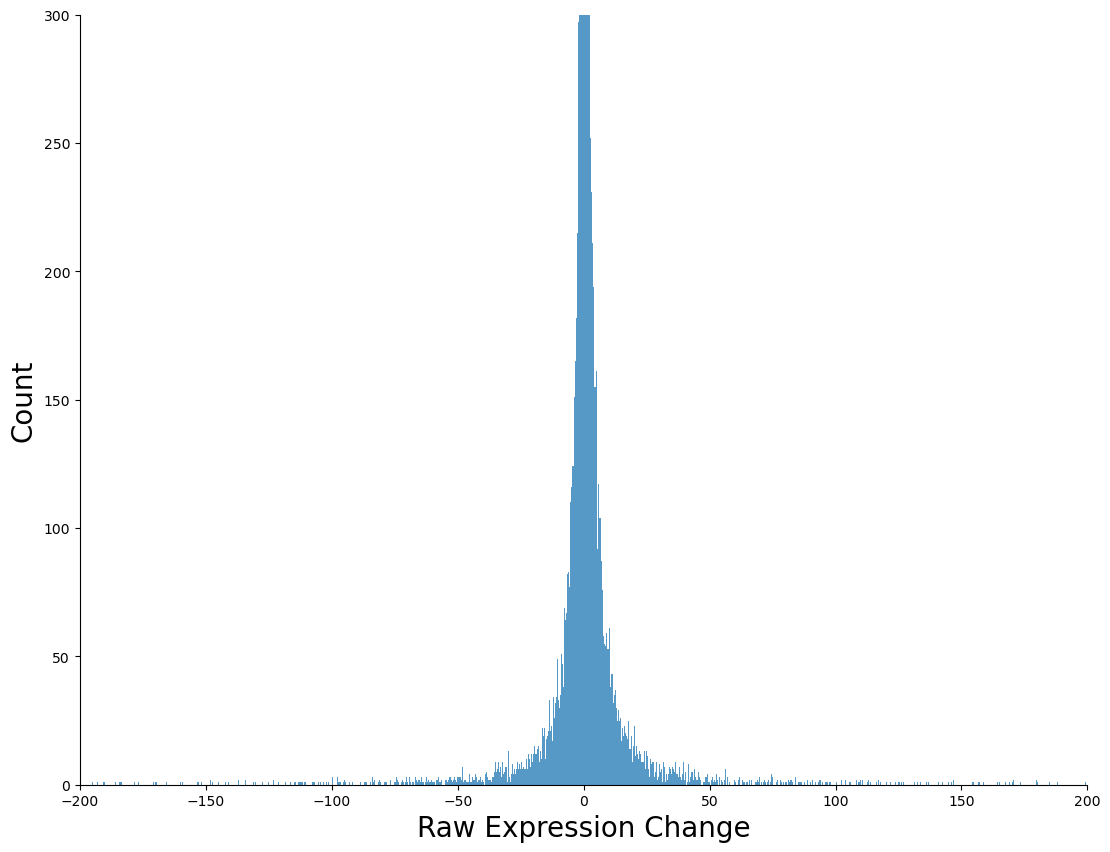

In [26]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Rep Difference',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Raw Expression Change", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-200,200))
plt.ylim((0, 300))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [27]:
quitoense_exploration_of_btw_rep_variance['Genes Averaged'] = quitoense_exploration_of_btw_rep_variance[['Rep 1','Rep 2']].mean(axis =1)
quitoense_exploration_of_btw_rep_variance['Percent Change'] = (quitoense_exploration_of_btw_rep_variance['Genes Averaged']/quitoense_exploration_of_btw_rep_variance['Rep Difference'])*100
quitoense_exploration_of_btw_rep_variance['Log2 Fold Change'] = np.log2((quitoense_exploration_of_btw_rep_variance['Rep 1']+1))-np.log2((quitoense_exploration_of_btw_rep_variance['Rep 2']+1))

In [28]:
quitoense_exploration_of_btw_rep_variance

,Rep 1,Rep 2,Mean,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
FEATURE_ID,,,,,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754,0.126143,0.091754,72.737972,0.166877
Solqui2.Cg000020.1,0.088258,0.122627,0.105443,-0.034370,0.105443,-306.791104,-0.044859
Solqui2.Cg000050.1,0.186422,0.621646,0.404034,-0.435224,0.404034,-92.833673,-0.450841
Solqui2.Cg000060.1,0.101622,0.169435,0.135528,-0.067813,0.135528,-199.856308,-0.086182
Solqui2.Cg000070.1,0.537335,0.656994,0.597164,-0.119660,0.597164,-499.052724,-0.108137
...,...,...,...,...,...,...,...
Solqui2.ctg00000691g000010.1,0.023048,0.076856,0.049952,-0.053808,0.049952,-92.833673,-0.073952
ncRNA_Solqui2.ctg00000739g003721.1,4.515794,0.721979,2.618887,3.793815,2.618887,69.030423,1.679501
ncRNA_Solqui2.ctg00000739g003731.1,0.056387,0.000000,0.028193,0.056387,0.028193,50.000000,0.079138


In [29]:
quitoense_exploration_of_btw_rep_variance.loc[(quitoense_exploration_of_btw_rep_variance['Percent Change']<-940)&(quitoense_exploration_of_btw_rep_variance['Percent Change']>-960)]

,Rep 1,Rep 2,Mean,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
FEATURE_ID,,,,,,,
Solqui2.Cg000110.1,0.114661,0.127450,0.121056,-0.012789,0.121056,-946.561283,-0.016458
Solqui2.Cg000880.1,0.056973,0.063328,0.060150,-0.006355,0.060150,-946.561283,-0.008648
Solqui2.Mg001370.1,0.511270,0.568296,0.539783,-0.057026,0.539783,-946.561283,-0.053436
Solqui2.Mg001540.1,0.049377,0.054884,0.052130,-0.005507,0.052130,-946.561283,-0.007552
Solqui2.Mg001680.1,0.117111,0.130174,0.123643,-0.013062,0.123643,-946.561283,-0.016771
...,...,...,...,...,...,...,...
Solqui2.12g018550.1,1.755867,1.951712,1.853789,-0.195845,1.853789,-946.561283,-0.099046
Solqui2.12g020050.1,0.086928,0.096624,0.091776,-0.009696,0.091776,-946.561283,-0.012812
Solqui2.12g022320.1,0.052599,0.058466,0.055532,-0.005867,0.055532,-946.561283,-0.008019


(0.0, 2500.0)

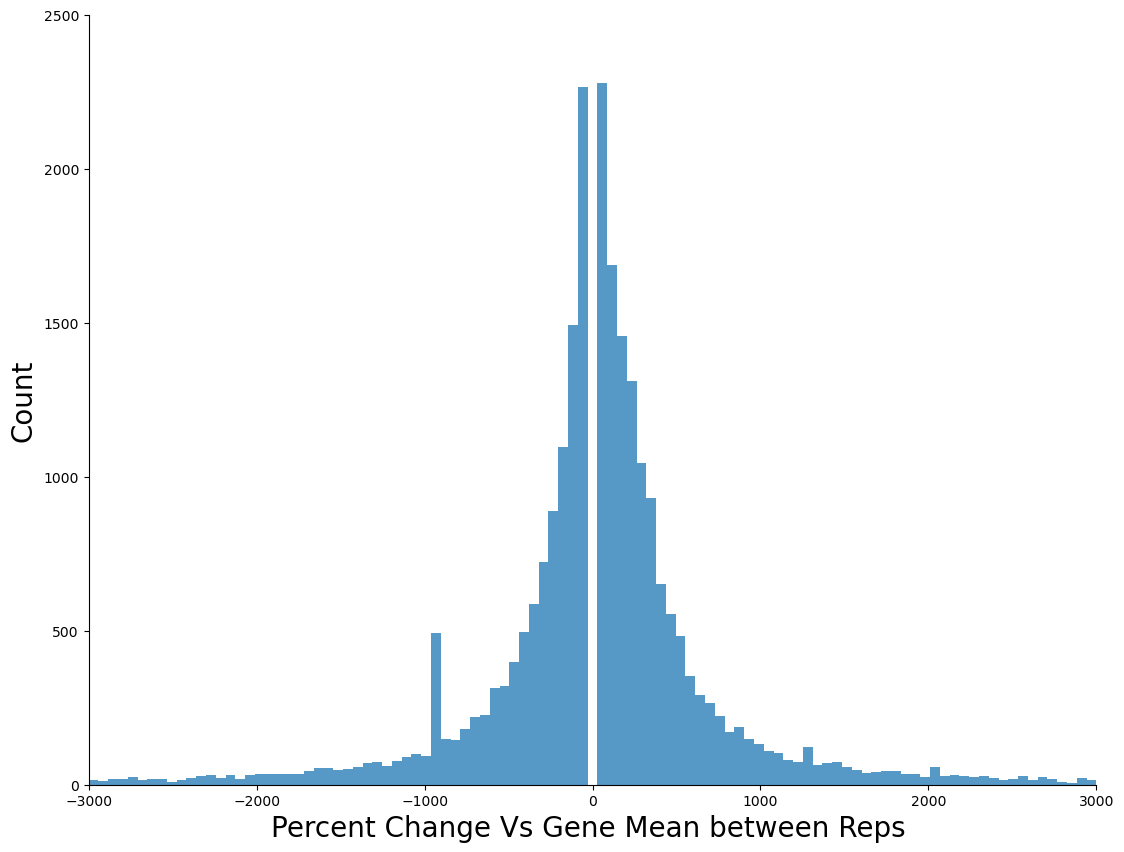

In [30]:
fig, ax = plt.subplots(figsize = (13,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Percent Change', bins = 90000)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Percent Change Vs Gene Mean between Reps ", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-3000,3000))
plt.ylim((0, 2500))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

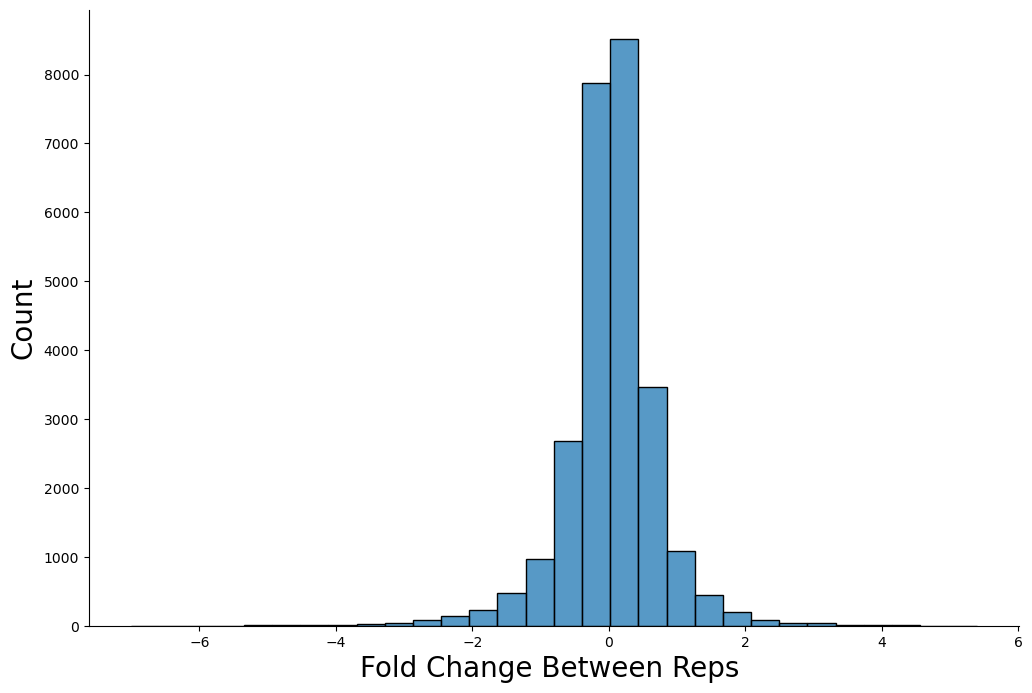

In [31]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = quitoense_exploration_of_btw_rep_variance, x = 'Log2 Fold Change', bins = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Fold Change Between Reps ", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [32]:
ortho_gene_pairs_df

,Alpha Gene,Beta Gene,Orthogroup
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239
...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120


In [33]:
normalized_combined_sample

,Rep 1,Rep 2,Mean
FEATURE_ID,,,
Solqui2.Cg000010.1,0.154825,0.028682,0.091754
Solqui2.Cg000020.1,0.088258,0.122627,0.105443
Solqui2.Cg000030.1,0.000000,0.000000,0.000000
ncRNA_Solqui2.Cg003561.1,0.000000,0.000000,0.000000
Solqui2.Cg000040.1,0.000000,0.000000,0.000000
...,...,...,...
Solqui2.ctg00000757g000020.1,0.000000,0.000000,0.000000
Solqui2.ctg00000760g000010.1,1.124269,0.052069,0.588169
Solqui2.ctg00000762g000010.1,0.000000,0.000000,0.000000


In [34]:
merged_alpha_gene =ortho_gene_pairs_df.merge(right = normalized_combined_sample, left_on = 'Alpha Gene',right_index= True)


In [35]:
merged_alpha_gene = merged_alpha_gene.rename(columns = {'Mean':'Alpha Gene Mean Expression', 'Rep 1':'Alpha Rep 1','Rep 2':'Alpha Rep 2'})
merged_alpha_gene

,Alpha Gene,Beta Gene,Orthogroup,Alpha Rep 1,Alpha Rep 2,Alpha Gene Mean Expression
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855,0.000000,0.000000,0.000000
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837,0.075011,0.055585,0.065298
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914,4.067791,0.118987,2.093389
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147,0.873998,1.566905,1.220452
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122,4.043551,11.547898,7.795725
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318,0.394303,0.000000,0.197152
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857,0.000000,0.000000,0.000000
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120,0.000000,0.000000,0.000000


In [36]:
paralog_difference_dataframe = merged_alpha_gene.merge(right = normalized_combined_sample, left_on = 'Beta Gene',right_index= True)
paralog_difference_dataframe = paralog_difference_dataframe.rename(columns  = {'Mean':'Beta Gene Mean Expression', 'Rep 1':'Beta Rep 1','Rep 2':'Beta Rep 2'})
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Orthogroup,Alpha Rep 1,Alpha Rep 2,Alpha Gene Mean Expression,Beta Rep 1,Beta Rep 2,Beta Gene Mean Expression
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837,0.075011,0.055585,0.065298,41.106099,30.106448,35.606273
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914,4.067791,0.118987,2.093389,62.511851,57.914438,60.213144
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147,0.873998,1.566905,1.220452,0.000000,0.000000,0.000000
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122,4.043551,11.547898,7.795725,0.239128,9.435888,4.837508
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318,0.394303,0.000000,0.197152,0.190306,0.105766,0.148036
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120,0.000000,0.000000,0.000000,0.000000,0.047226,0.023613


In [37]:
paralog_difference_dataframe['Rep Difference'] = paralog_difference_dataframe['Alpha Gene Mean Expression'] - paralog_difference_dataframe['Beta Gene Mean Expression']

In [38]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Orthogroup,Alpha Rep 1,Alpha Rep 2,Alpha Gene Mean Expression,Beta Rep 1,Beta Rep 2,Beta Gene Mean Expression,Rep Difference
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837,0.075011,0.055585,0.065298,41.106099,30.106448,35.606273,-35.540975
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914,4.067791,0.118987,2.093389,62.511851,57.914438,60.213144,-58.119755
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147,0.873998,1.566905,1.220452,0.000000,0.000000,0.000000,1.220452
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122,4.043551,11.547898,7.795725,0.239128,9.435888,4.837508,2.958217
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318,0.394303,0.000000,0.197152,0.190306,0.105766,0.148036,0.049115
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120,0.000000,0.000000,0.000000,0.000000,0.047226,0.023613,-0.023613


In [39]:
paralog_difference_dataframe['Genes Averaged'] = paralog_difference_dataframe[['Alpha Gene Mean Expression','Beta Gene Mean Expression']].mean(axis =1)

In [40]:
paralog_difference_dataframe['Percent Change'] = (paralog_difference_dataframe['Genes Averaged']/paralog_difference_dataframe['Rep Difference'])*100

In [41]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Orthogroup,Alpha Rep 1,Alpha Rep 2,Alpha Gene Mean Expression,Beta Rep 1,Beta Rep 2,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837,0.075011,0.055585,0.065298,41.106099,30.106448,35.606273,-35.540975,17.835786,-50.183726
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914,4.067791,0.118987,2.093389,62.511851,57.914438,60.213144,-58.119755,31.153267,-53.601854
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147,0.873998,1.566905,1.220452,0.000000,0.000000,0.000000,1.220452,0.610226,50.000000
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122,4.043551,11.547898,7.795725,0.239128,9.435888,4.837508,2.958217,6.316616,213.527843
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318,0.394303,0.000000,0.197152,0.190306,0.105766,0.148036,0.049115,0.172594,351.404024
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120,0.000000,0.000000,0.000000,0.000000,0.047226,0.023613,-0.023613,0.011806,-50.000000


(0.0, 600.0)

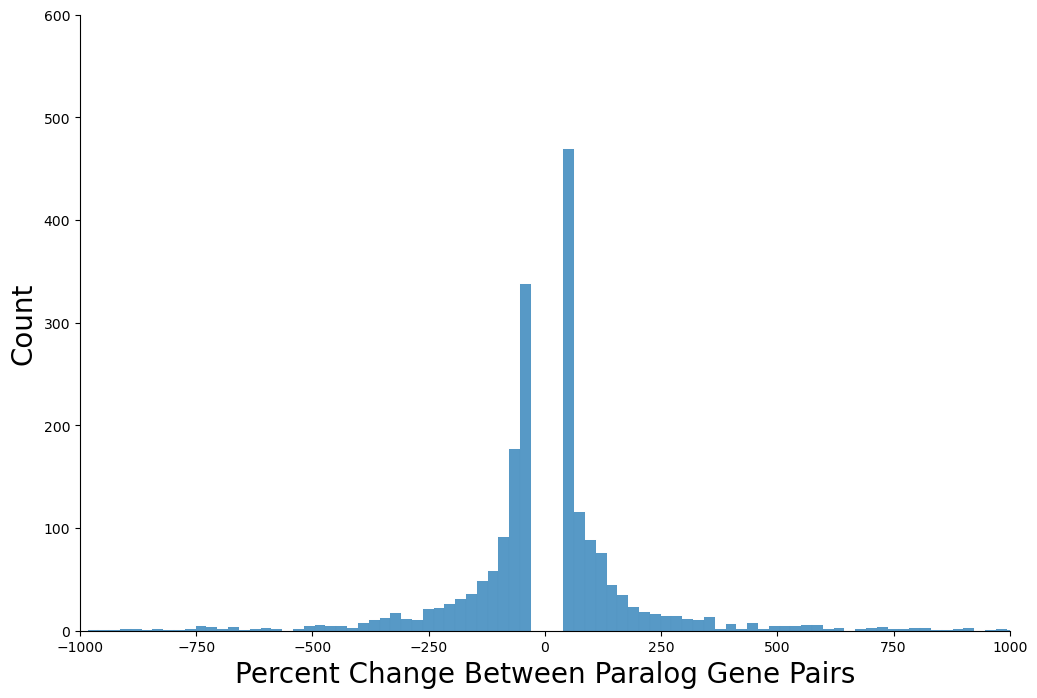

In [42]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = paralog_difference_dataframe, x = 'Percent Change',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Percent Change Between Paralog Gene Pairs", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-1000,1000))
plt.ylim((0, 600))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [43]:
np.percentile(paralog_difference_dataframe['Percent Change'].dropna(), 85)

135.4650895968249

In [44]:
np.percentile(paralog_difference_dataframe['Rep Difference'], 95)

46.84208828529203

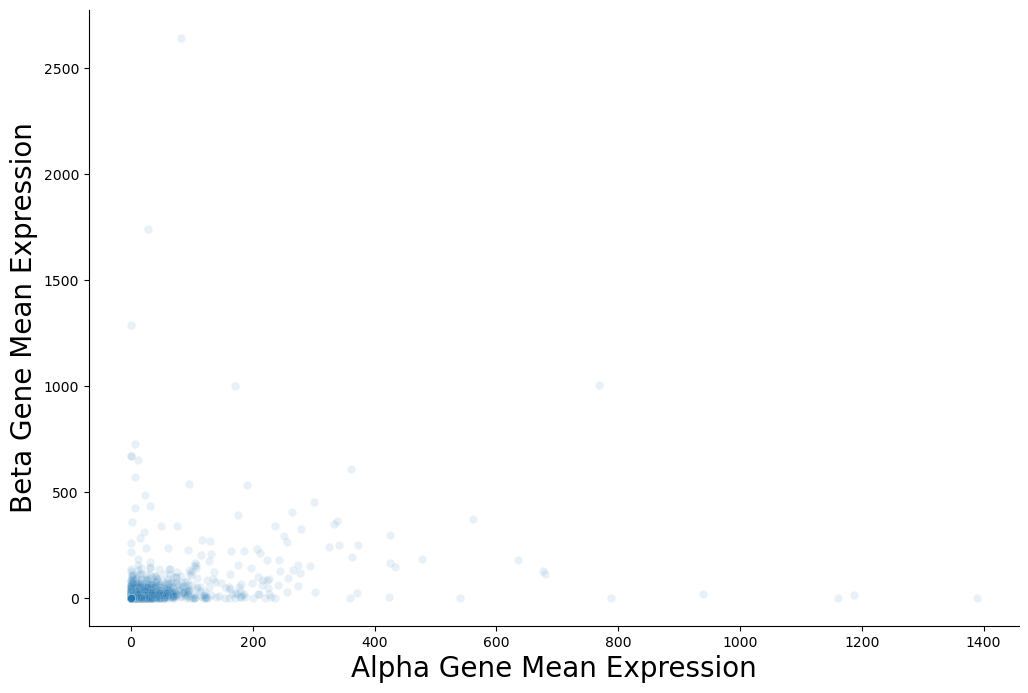

In [45]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(data = paralog_difference_dataframe, x = 'Alpha Gene Mean Expression', y = 'Beta Gene Mean Expression', alpha= .1)
plt.ylabel("Beta Gene Mean Expression", fontsize = 20)
plt.xlabel("Alpha Gene Mean Expression", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,200))
# plt.ylim((0, 200))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [46]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Orthogroup,Alpha Rep 1,Alpha Rep 2,Alpha Gene Mean Expression,Beta Rep 1,Beta Rep 2,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837,0.075011,0.055585,0.065298,41.106099,30.106448,35.606273,-35.540975,17.835786,-50.183726
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914,4.067791,0.118987,2.093389,62.511851,57.914438,60.213144,-58.119755,31.153267,-53.601854
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147,0.873998,1.566905,1.220452,0.000000,0.000000,0.000000,1.220452,0.610226,50.000000
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122,4.043551,11.547898,7.795725,0.239128,9.435888,4.837508,2.958217,6.316616,213.527843
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318,0.394303,0.000000,0.197152,0.190306,0.105766,0.148036,0.049115,0.172594,351.404024
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120,0.000000,0.000000,0.000000,0.000000,0.047226,0.023613,-0.023613,0.011806,-50.000000


(0.0, 1000.0)

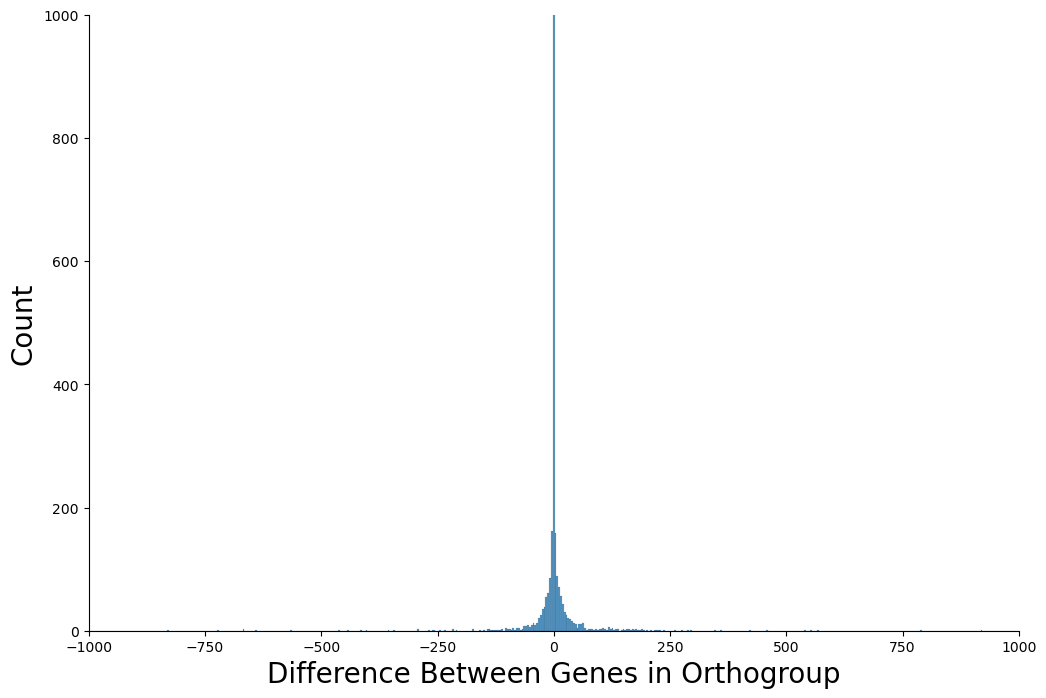

In [47]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(x = paralog_difference_dataframe['Rep Difference'], bins = 1000)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Difference Between Genes in Orthogroup", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((-1000,1000))
plt.ylim((0, 1000))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [48]:
paralog_difference_dataframe['Log2 Fold Change'] = np.log2((paralog_difference_dataframe['Alpha Gene Mean Expression']+1))-np.log2((paralog_difference_dataframe['Beta Gene Mean Expression']+1))

In [49]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Orthogroup,Alpha Rep 1,Alpha Rep 2,Alpha Gene Mean Expression,Beta Rep 1,Beta Rep 2,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
0,Solqui2.08g023840.1,Solqui2.08g023930.1,OG0004855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
1,Solqui2.11g019510.1,Solqui2.Mg000630.1,OG0005837,0.075011,0.055585,0.065298,41.106099,30.106448,35.606273,-35.540975,17.835786,-50.183726,-5.102762
2,Solqui2.04g024140.1,Solqui2.05g025880.1,OG0001914,4.067791,0.118987,2.093389,62.511851,57.914438,60.213144,-58.119755,31.153267,-53.601854,-4.306581
3,Solqui2.09g021410.1,Solqui2.09g021430.1,OG0005147,0.873998,1.566905,1.220452,0.000000,0.000000,0.000000,1.220452,0.610226,50.000000,1.150853
4,Solqui2.01g019530.1,Solqui2.10g010420.1,OG0003239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,Solqui2.02g012980.1,Solqui2.12g004790.1,OG0003122,4.043551,11.547898,7.795725,0.239128,9.435888,4.837508,2.958217,6.316616,213.527843,0.591450
2799,Solqui2.11g007020.1,Solqui2.11g007040.1,OG0022318,0.394303,0.000000,0.197152,0.190306,0.105766,0.148036,0.049115,0.172594,351.404024,0.060438
2800,Solqui2.01g006180.1,Solqui2.02g010810.1,OG0044857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
2801,Solqui2.03g004800.1,Solqui2.07g019080.1,OG0022120,0.000000,0.000000,0.000000,0.000000,0.047226,0.023613,-0.023613,0.011806,-50.000000,-0.033670


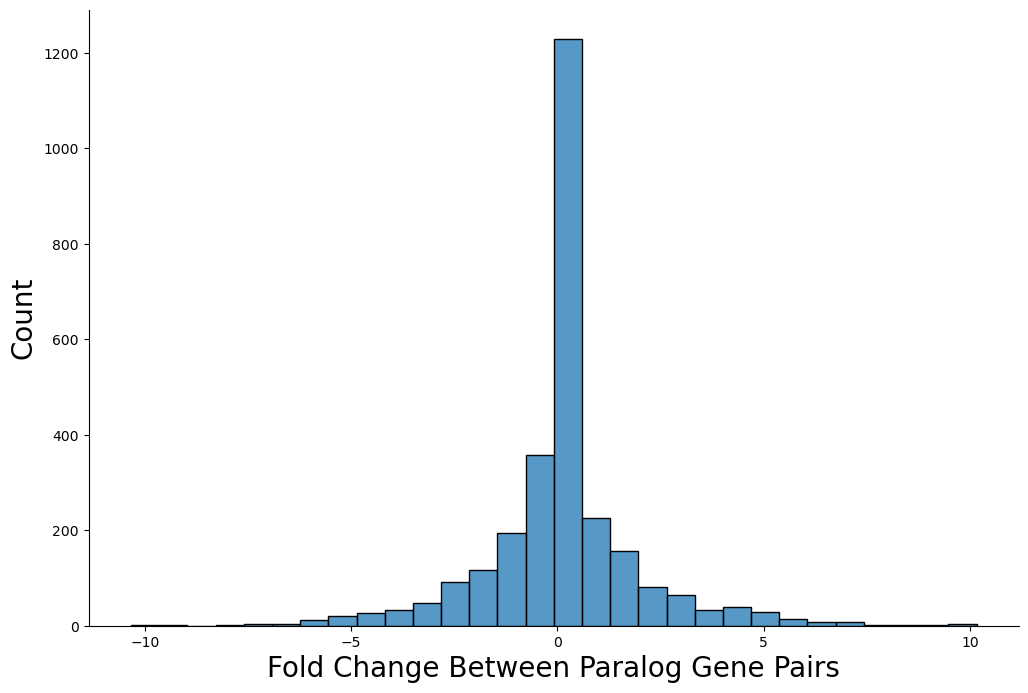

In [50]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = paralog_difference_dataframe, x = 'Log2 Fold Change', bins = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Fold Change Between Paralog Gene Pairs", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [51]:
np.percentile(paralog_difference_dataframe['Log2 Fold Change'], 95)

3.306994914128837

In [52]:
fold_change_tidy_plotter = pd.DataFrame(data = paralog_difference_dataframe['Log2 Fold Change'], columns = ['Log2 Fold Change'])
fold_change_tidy_plotter

,Log2 Fold Change
0,0.000000
1,-5.102762
2,-4.306581
3,1.150853
4,0.000000
...,...
2798,0.591450
2799,0.060438
2800,0.000000
2801,-0.033670


In [53]:
fold_change_tidy_plotter['Gene Relationship'] = 'Between Paralogs -Mean of Two Replicates'

In [54]:

fold_change_quitoense = pd.DataFrame(quitoense_exploration_of_btw_rep_variance['Log2 Fold Change'], columns = ['Log2 Fold Change'])
fold_change_quitoense['Gene Relationship'] = 'Between Replicates - Single Measurement'


In [55]:
# import pickle
# file = open('/data/passala/Generated_Tables/Temp_junk/quitoense_tidy_plotter_for_background.p', 'wb')
# pickle.dump(fold_change_quitoense,file)
# file.close()

In [56]:
fold_change_tidy_plotter = pd.concat([fold_change_tidy_plotter,fold_change_quitoense], ignore_index= True)


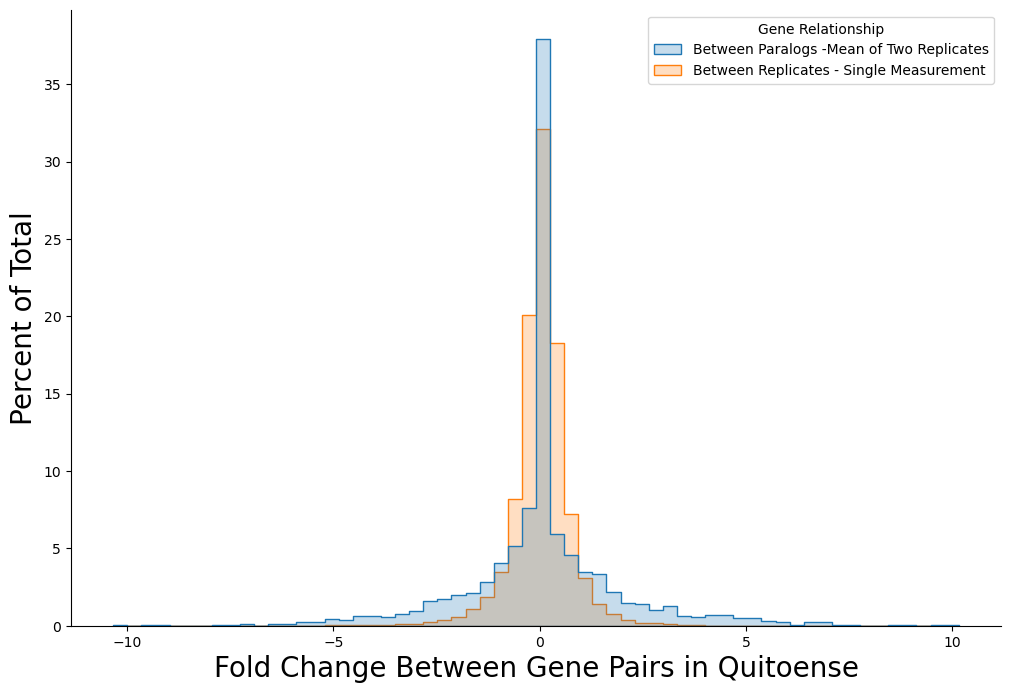

In [57]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = fold_change_tidy_plotter, x = 'Log2 Fold Change', hue = 'Gene Relationship', bins = 60,  element = 'step',stat = 'percent', common_norm= False)
plt.ylabel("Percent of Total", fontsize = 20)
plt.xlabel("Fold Change Between Gene Pairs in Quitoense", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [58]:
fold_change_tidy_plotter

,Log2 Fold Change,Gene Relationship
0,0.000000,Between Paralogs -Mean of Two Replicates
1,-5.102762,Between Paralogs -Mean of Two Replicates
2,-4.306581,Between Paralogs -Mean of Two Replicates
3,1.150853,Between Paralogs -Mean of Two Replicates
4,0.000000,Between Paralogs -Mean of Two Replicates
...,...,...
29253,-0.073952,Between Replicates - Single Measurement
29254,1.679501,Between Replicates - Single Measurement
29255,0.079138,Between Replicates - Single Measurement
29256,0.557616,Between Replicates - Single Measurement


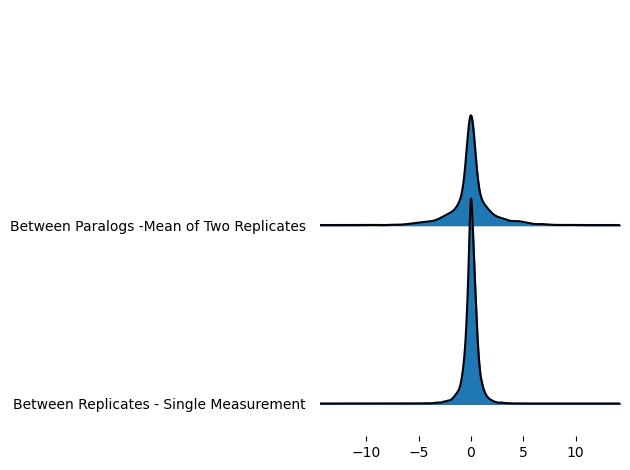

In [59]:
fig, axes = joypy.joyplot(fold_change_tidy_plotter, by = 'Gene Relationship')

In [60]:
hamsini_paralog_scores = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/tomato_atlas_DGD_paralogs.csv')
hamsini_paralog_scores

,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo
0,Solyc00g007330,Solyc00g012540,WGD,NaN,0.000000,0.000000,0.500071,0.658967,0.973323,0.459708,0.398019
1,Solyc00g008030,Solyc00g014170,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Solyc00g008050,Solyc00g014180,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Solyc00g008130,Solyc00g014190,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Solyc00g008690,Solyc00g015610,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34119,Solyc12g100240,Solyc01g006430,dispersed,0.854729,1237.243728,32.019349,0.527514,0.408087,0.427951,0.475699,0.392357
34120,Solyc12g100260,Solyc01g006430,dispersed,0.822797,1234.007865,30.999681,0.409578,0.331302,0.383885,NaN,NaN
34121,Solyc12g100280,Solyc10g006860,dispersed,1.202840,85.351976,13.458956,0.227706,0.271563,0.184334,NaN,NaN
34122,Solyc12g100290,Solyc07g008460,dispersed,0.261755,101.594535,7.438252,0.894424,0.806934,0.754505,NaN,NaN


In [57]:
paralog_difference_dataframe

,Alpha Gene,Beta Gene,Orthogroup,Alpha Rep 1,Alpha Rep 2,Alpha Gene Mean Expression,Beta Rep 1,Beta Rep 2,Beta Gene Mean Expression,Rep Difference,Genes Averaged,Percent Change,Log2 Fold Change
0,Solqui2.01g000820.1,Solqui2.03g027000.1,OG0002003,36.562594,25.442659,31.002626,30.585985,22.942556,26.764271,4.238356,28.883449,681.477694,0.204961
1,Solqui2.09g013590.1,Solqui2.Mg000120.1,OG0002401,0.134005,0.000000,0.067003,0.000000,0.000000,0.000000,0.067003,0.033501,50.000000,0.093564
2,Solqui2.01g008550.1,Solqui2.04g009030.1,OG0003553,0.000000,0.000000,0.000000,0.103803,0.000000,0.051902,-0.051902,0.025951,-50.000000,-0.073000
3,Solqui2.03g014870.1,Solqui2.09g005250.1,OG0001003,69.871529,33.270881,51.571205,20.635814,15.066773,17.851294,33.719911,34.711249,102.939918,1.479609
4,Solqui2.01g001030.1,Solqui2.01g001050.1,OG0002918,139.687203,100.035143,119.861173,0.412631,26.621902,13.517267,106.343906,66.689220,62.710899,3.057509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,Solqui2.05g011030.1,Solqui2.05g011050.1,OG0007325,0.000000,0.057257,0.028628,1.390609,2.671397,2.031003,-2.002374,1.029816,-51.429724,-1.559073
2799,Solqui2.04g004560.1,Solqui2.08g002090.1,OG0002421,119.190591,72.902830,96.046710,151.422468,77.882682,114.652575,-18.605865,105.349643,-566.217398,-0.253046
2800,Solqui2.06g017680.1,Solqui2.08g022680.1,OG0002820,36.573488,35.209258,35.891373,12.660745,8.892009,10.776377,25.114996,23.333875,92.908136,1.647388
2801,Solqui2.05g018530.1,Solqui2.05g018540.1,OG0021563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000


In [58]:
tomato_table = orthogroups[['Orthogroup','SlycHeinz4.0']]
tomato_table = tomato_table.dropna()
tomato_table

,Orthogroup,SlycHeinz4.0
3,OG0000003,Solyc02g004000.1.1
5,OG0000005,Solyc02g030550.1.1
6,OG0000006,"Solyc01g014055.1.1, Solyc01g056575.1.1, Solyc0..."
8,OG0000008,"Solyc01g011356.1.1, Solyc02g037545.1.1, Solyc0..."
9,OG0000009,"Solyc08g061710.3.1, Solyc08g061720.1.1, Solyc0..."
...,...,...
38715,OG0038715,Solyc12g044170.1.1
38716,OG0038716,Solyc12g049618.1.1
38717,OG0038717,Solyc12g150129.1.1
38718,OG0038718,Solyc12g098720.3.1


In [59]:
df_conversion_base = []
list_of_lenghts = []
for Orthogroup_row in tomato_table.iterrows():
    current_orthogroup = Orthogroup_row[1][0]
    current_list_of_genes_in_group = Orthogroup_row[1][1].replace(" ",'').split(',')
    list_of_lenghts.append(len(current_list_of_genes_in_group))
    if len(current_list_of_genes_in_group) >2 or len(current_list_of_genes_in_group) == 1:
        continue
    orthogroup_list = [current_orthogroup]*len(current_list_of_genes_in_group)
    zipped_list = zip(orthogroup_list, current_list_of_genes_in_group)
    df_conversion_base.extend(list(zipped_list))

In [60]:
quitoense_long_df = pd.DataFrame(data=df_conversion_base, columns = ['Orthogroup','Gene'])
quitoense_long_df

,Orthogroup,Gene
0,OG0000024,Solyc06g008368.1.1
1,OG0000024,Solyc06g008785.1.1
2,OG0000070,Solyc08g082550.1.1
3,OG0000070,Solyc08g083000.2.1
4,OG0000076,Solyc05g041960.1.1
...,...,...
4339,OG0038467,Solyc01g150153.1.1
4340,OG0038488,Solyc02g088950.3.1
4341,OG0038488,Solyc02g088980.3.1
4342,OG0038616,Solyc08g044300.1.1


In [61]:
list_of_gene_pairs_in_ortho_group = []
for ortho in set(quitoense_long_df['Orthogroup']):
    matched_long_df = quitoense_long_df.loc[quitoense_long_df['Orthogroup'] == ortho]
    all_combinations_in_orthogroup = matched_long_df['Gene'].to_list()
    all_combinations_in_orthogroup.append(ortho)
    list_of_gene_pairs_in_ortho_group.append(all_combinations_in_orthogroup)

In [62]:
tomato_gene_pairs = pd.DataFrame(data=  list_of_gene_pairs_in_ortho_group, columns = ['Alpha Gene','Beta Gene','Orthogroup'])
tomato_gene_pairs

,Alpha Gene,Beta Gene,Orthogroup
0,Solyc01g006350.4.1,Solyc03g111570.4.1,OG0002003
1,Solyc03g095190.4.1,Solyc06g048430.4.1,OG0001747
2,Solyc09g092283.1.1,Solyc09g092287.1.1,OG0026118
3,Solyc03g150115.1.1,Solyc03g150116.1.1,OG0027921
4,Solyc05g009360.4.1,Solyc11g008100.3.1,OG0031117
...,...,...,...
2167,Solyc04g012070.3.1,Solyc09g089860.4.1,OG0005456
2168,Solyc04g017710.3.1,Solyc10g079190.3.1,OG0002421
2169,Solyc06g066290.3.1,Solyc08g076180.3.1,OG0002820
2170,Solyc05g016040.2.1,Solyc05g025550.1.1,OG0026032


In [63]:
hamsini_paralog_scores['Gene1'] = hamsini_paralog_scores['Gene1']+'.1.1'
hamsini_paralog_scores['Gene2'] = hamsini_paralog_scores['Gene2']+'.1.1'
hamsini_paralog_scores

,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo
0,Solyc00g007330.1.1,Solyc00g012540.1.1,WGD,NaN,0.000000,0.000000,0.500071,0.658967,0.973323,0.459708,0.398019
1,Solyc00g008030.1.1,Solyc00g014170.1.1,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Solyc00g008050.1.1,Solyc00g014180.1.1,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Solyc00g008130.1.1,Solyc00g014190.1.1,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Solyc00g008690.1.1,Solyc00g015610.1.1,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34119,Solyc12g100240.1.1,Solyc01g006430.1.1,dispersed,0.854729,1237.243728,32.019349,0.527514,0.408087,0.427951,0.475699,0.392357
34120,Solyc12g100260.1.1,Solyc01g006430.1.1,dispersed,0.822797,1234.007865,30.999681,0.409578,0.331302,0.383885,NaN,NaN
34121,Solyc12g100280.1.1,Solyc10g006860.1.1,dispersed,1.202840,85.351976,13.458956,0.227706,0.271563,0.184334,NaN,NaN
34122,Solyc12g100290.1.1,Solyc07g008460.1.1,dispersed,0.261755,101.594535,7.438252,0.894424,0.806934,0.754505,NaN,NaN


In [64]:
first_half_matched = hamsini_paralog_scores.merge(right = tomato_gene_pairs, left_on= ['Gene1','Gene2'],right_on=['Alpha Gene','Beta Gene'])
second_half_matched = hamsini_paralog_scores.merge(right = tomato_gene_pairs, left_on= ['Gene2','Gene1'],right_on=['Alpha Gene','Beta Gene'])

In [65]:
full_matched_paralog_scores = pd.concat([first_half_matched,second_half_matched])
full_matched_paralog_scores

,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo,Alpha Gene,Beta Gene,Orthogroup
0,Solyc02g068200.1.1,Solyc02g094290.1.1,WGD,0.912762,105.524139,14.232326,0.812575,0.905589,0.851617,0.564903,0.659223,Solyc02g068200.1.1,Solyc02g094290.1.1,OG0003312
1,Solyc02g067680.1.1,Solyc02g087040.1.1,WGD,0.277653,10.993811,3.327590,0.976119,0.958036,0.967512,0.616771,0.756998,Solyc02g067680.1.1,Solyc02g087040.1.1,OG0002055
2,Solyc03g115690.1.1,Solyc06g069680.1.1,WGD,0.169614,96.968998,9.247939,0.961999,0.978559,0.948847,0.699288,0.889684,Solyc03g115690.1.1,Solyc06g069680.1.1,OG0002967
3,Solyc03g121830.1.1,Solyc06g062810.1.1,WGD,0.150130,73.434959,2.004991,0.956911,0.972799,0.986148,0.761019,0.877379,Solyc03g121830.1.1,Solyc06g062810.1.1,OG0002127
4,Solyc03g110990.1.1,Solyc06g071930.1.1,WGD,0.513572,30.514305,6.245766,0.711836,0.824371,0.772466,0.630081,0.712966,Solyc03g110990.1.1,Solyc06g071930.1.1,OG0005998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Solyc12g062560.1.1,Solyc07g021200.1.1,transposed,NaN,0.000000,0.000000,0.500071,0.452990,0.340612,NaN,NaN,Solyc07g021200.1.1,Solyc12g062560.1.1,OG0028090
4,Solyc03g082370.1.1,Solyc03g081330.1.1,dispersed,1.004094,71.594691,7.870109,0.942220,0.910462,0.871280,NaN,NaN,Solyc03g081330.1.1,Solyc03g082370.1.1,OG0003521
5,Solyc08g028930.1.1,Solyc01g017420.1.1,dispersed,NaN,0.000000,0.000000,0.500071,0.557787,0.603686,NaN,NaN,Solyc01g017420.1.1,Solyc08g028930.1.1,OG0002924
6,Solyc11g072780.1.1,Solyc11g021160.1.1,dispersed,NaN,0.110486,0.153320,0.500071,0.396049,0.055335,NaN,NaN,Solyc11g021160.1.1,Solyc11g072780.1.1,OG0003612


In [66]:
high_quality_paralogs = full_matched_paralog_scores.loc[full_matched_paralog_scores['fc_top10'] >.8]
high_quality_paralogs = high_quality_paralogs.drop(columns = ['Alpha Gene','Beta Gene'])

In [85]:
high_quality_hits_quitoense = paralog_difference_dataframe.merge(right = high_quality_paralogs, on = 'Orthogroup')
high_quality_hits_quitoense = high_quality_hits_quitoense[['Gene1','Gene2','Alpha Gene','Beta Gene', 'Alpha Rep 1','Alpha Rep 2','Beta Rep 1','Beta Rep 2','Log2 Fold Change','coexp','fc_top10','duptype']]

In [86]:
high_quality_hits_quitoense.sort_values(by = 'Log2 Fold Change')

,Gene1,Gene2,Alpha Gene,Beta Gene,Alpha Rep 1,Alpha Rep 2,Beta Rep 1,Beta Rep 2,Log2 Fold Change,coexp,fc_top10,duptype
14,Solyc06g048820.1.1,Solyc06g050760.1.1,Solqui2.06g009450.1,Solqui2.06g010100.1,0.407799,0.181313,414.572971,101.673480,-7.645037,0.839441,0.829074,transposed
7,Solyc03g118270.1.1,Solyc02g084210.1.1,Solqui2.02g008960.1,Solqui2.03g034100.1,0.383810,0.369737,16.681746,17.664331,-3.722436,0.737469,0.822624,transposed
8,Solyc03g096770.1.1,Solyc03g096780.1.1,Solqui2.03g023490.1,Solqui2.03g023500.1,1.172785,4.736391,19.775834,44.475096,-3.066342,0.999079,0.898685,tandem
16,Solyc11g066670.1.1,Solyc11g066680.1.1,Solqui2.11g030620.1,Solqui2.11g030630.1,13.227141,7.234790,85.172121,60.307347,-2.714960,0.947728,0.961201,tandem
22,Solyc06g071060.1.1,Solyc06g071070.1.1,Solqui2.06g024530.1,Solqui2.06g024540.1,3.987905,4.167501,31.866010,18.979322,-2.379528,0.912881,0.972341,tandem
23,Solyc08g013690.1.1,Solyc08g013700.1.1,Solqui2.10g018730.1,Solqui2.10g018740.1,0.141016,3.892483,1.112780,11.544369,-1.280538,0.935699,0.969156,tandem
1,Solyc09g005080.1.1,Solyc09g005090.1.1,Solqui2.09g009050.1,Solqui2.09g009070.1,0.020018,0.244753,1.327950,1.283171,-1.025753,0.991166,0.993495,tandem
12,Solyc04g010200.1.1,Solyc04g010210.1.1,Solqui2.04g000130.1,Solqui2.04g000140.1,0.176151,0.209784,1.026702,0.619921,-0.612006,0.868408,0.876433,tandem
5,Solyc03g112360.1.1,Solyc06g071720.1.1,Solqui2.03g027890.1,Solqui2.06g025220.1,273.771114,327.651633,507.855819,396.223249,-0.586468,0.890976,0.952840,WGD
29,Solyc12g088390.1.1,Solyc12g088400.1.1,Solqui2.12g018060.1,Solqui2.12g018070.1,0.000000,0.518234,0.600402,0.905715,-0.477462,0.990483,0.995820,tandem


In [88]:
high_quality_hits_quitoense.loc[(high_quality_hits_quitoense['Log2 Fold Change']> 3)| (high_quality_hits_quitoense['Log2 Fold Change'] <-3)]

,Gene1,Gene2,Alpha Gene,Beta Gene,Alpha Rep 1,Alpha Rep 2,Beta Rep 1,Beta Rep 2,Log2 Fold Change,coexp,fc_top10,duptype
7,Solyc03g118270.1.1,Solyc02g084210.1.1,Solqui2.02g008960.1,Solqui2.03g034100.1,0.383810,0.369737,16.681746,17.664331,-3.722436,0.737469,0.822624,transposed
8,Solyc03g096770.1.1,Solyc03g096780.1.1,Solqui2.03g023490.1,Solqui2.03g023500.1,1.172785,4.736391,19.775834,44.475096,-3.066342,0.999079,0.898685,tandem
14,Solyc06g048820.1.1,Solyc06g050760.1.1,Solqui2.06g009450.1,Solqui2.06g010100.1,0.407799,0.181313,414.572971,101.673480,-7.645037,0.839441,0.829074,transposed
19,Solyc03g083730.1.1,Solyc03g083770.1.1,Solqui2.03g017320.1,Solqui2.03g017350.1,40.354617,25.337462,0.994867,0.150795,4.427551,0.987748,0.981130,proximal
